<br>**Part A (1 mark)**

<br>Load the required libraries.<br>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Matern, ConstantKernel, DotProduct, Exponentiation
from sklearn.model_selection import train_test_split

1. Set your student id as the variable SEED<br>

In [ ]:
# Set my id as the variable SEED
SEED = 1481257

2. Define the data generator using the following:
```
def data_generator(n_examples,seed=314159265):
  np.random.seed(seed)
  x=(np.random.rand(n_examples)-0.5)*4
  np.random.seed(seed+1)
  y=0.5*x**2+np.sin(8*x)/4+np.random.randn(n_examples)*0.1
  x=x.reshape(n_examples,1)
  return x,y
```



In [ ]:
# Define the data generator
def data_generator(n_examples, seed=SEED):
    np.random.seed(seed)
    x = (np.random.rand(n_examples) - 0.5) * 4
    np.random.seed(seed + 1)
    y = 0.5 * x**2 + np.sin(8 * x) / 4 + np.random.randn(n_examples) * 0.1
    x = x.reshape(n_examples, 1)
    return x, y

3. Generate 1000 samples using data_generator, using your ID as the random seed, and visualize it using a scatter plot

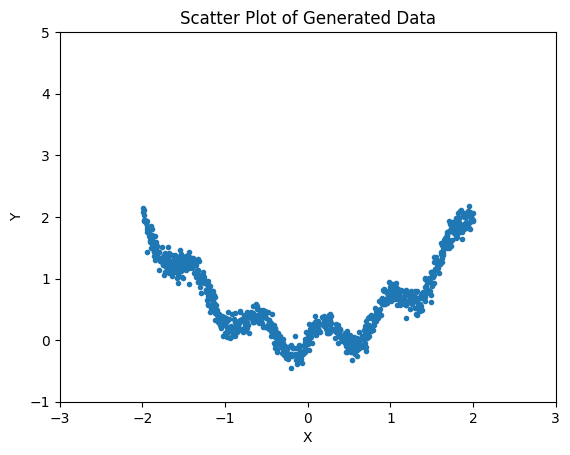

In [ ]:

# Generate 1000 samples, using your ID as the random seed
x_data, y_data = data_generator(1000)

# Visualize using a scatter plot
plt.scatter(x_data, y_data, marker='.', label='Data')
plt.xlim(-3, 3)
plt.ylim(-1, 5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Generated Data')
plt.show()





4. Do a 3x3 subplot, in each subplot, you will plot the graphs for one of each results of for n_examples=4,8,12,32,64,128,256,512,1024<br><br>
  The subplot should contain:
  - the mean predicted values of the GaussianProcessRegressor (leave the kernel blank, we will use the default kernel (RBF) for now)
  - and the 2 standard deviation intervals of the predictions
  - Overlay the ground truth concept in red in the plot
  - the scatter plots of the data used to fit the GaussianProcessRegressor
  - set y_lim to (-1,5) and x_lim to (-3,3)

*Note: the instructions stated that n_examples should be for results of 4,8,12...*<br>*This does not seem right, so I changed the 12 to a 16.*

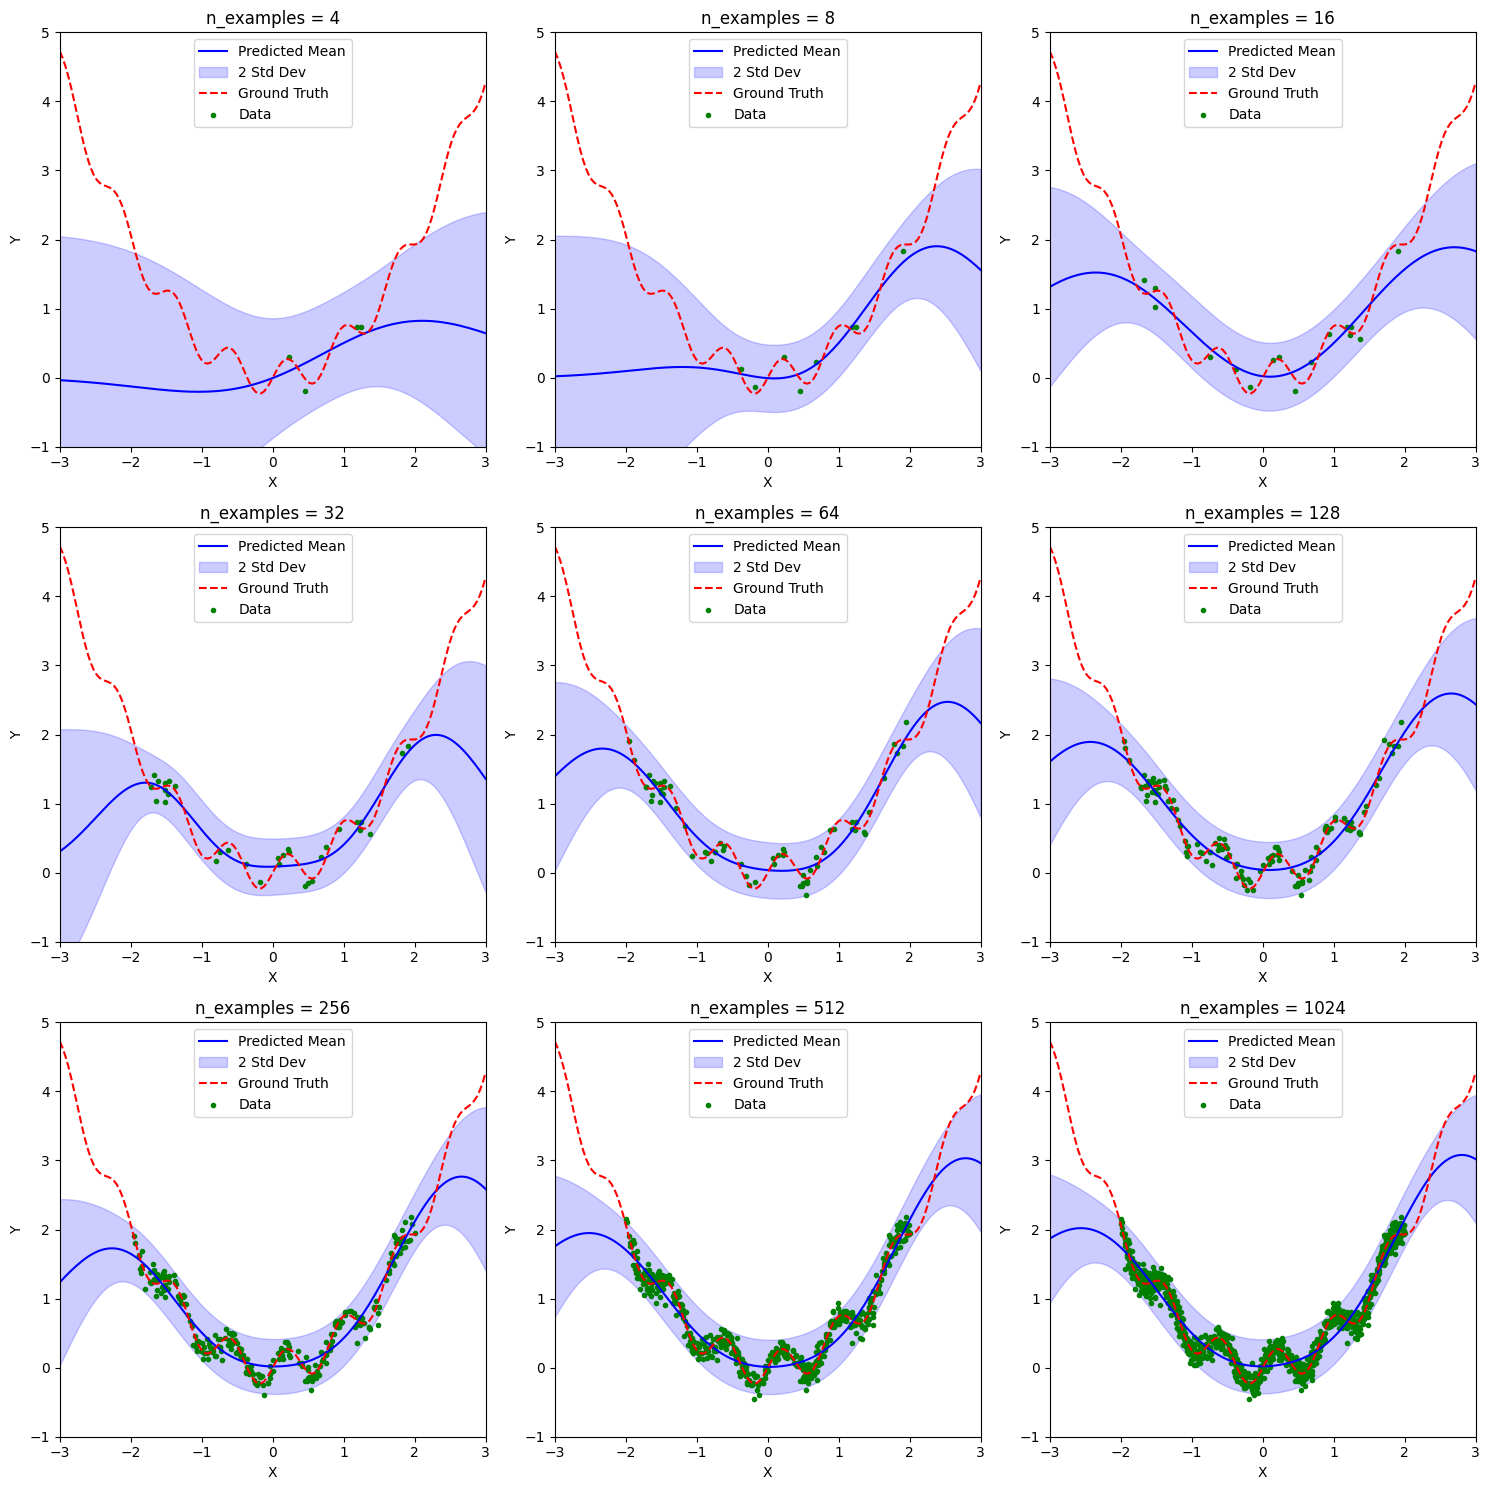

In [ ]:
# Results will be for n_examples=4,8,16,32,64,128,256,512,1024
n_examples_list = [4, 8, 16, 32, 64, 128, 256, 512, 1024]

# Define a groundTruth function
def groundTruth(X_test):
    return 0.5 * X_test**2 + np.sin(8 * X_test) / 4

X_test = np.linspace(-3, 3, 151).reshape(-1, 1)
plt.figure(figsize=(15, 15))

# Do 3x3 subplots for all listings in n_examples
for i, n_examples in enumerate(n_examples_list):
    plt.subplot(3, 3, i + 1)

    # Generate data for the given n_example listing
    x_data, y_data = data_generator(n_examples)

    # Fit GaussianProcessRegressor (leave the kernel blank, we will use the default kernel (RBF) for now)
    kernel = RBF() + WhiteKernel()
    reg = GaussianProcessRegressor(kernel=kernel)
    reg.fit(x_data, y_data)

    # Predict using the model
    y_pred, y_std = reg.predict(X_test, return_std=True)

    # Plot the results
    plt.plot(X_test, y_pred, 'b-', label='Predicted Mean')

    # Display the 2 standard deviation intervals of the predictions
    plt.fill_between(X_test.ravel(), y_pred - 2 * y_std, y_pred + 2 * y_std, alpha=0.2, color='blue', label='2 Std Dev')

    # Overlay the ground truth concept in red in the plot
    plt.plot(X_test, groundTruth(X_test), 'r--', label='Ground Truth')

    # Exhibit the scatter plot of the data used to fit the GaussianProcessRegressor
    plt.scatter(x_data, y_data, marker='.', label='Data', color='green')



    # Set y_lim to (-1,5) and x_lim to (-3,3)
    plt.ylim(-1, 5)
    plt.xlim(-3, 3)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'n_examples = {n_examples}')
    plt.legend()

plt.tight_layout()
plt.show()



5. Do a 3x3 subplot, in each subplot, you will plot the graphs for one of each results of for n_examples=4,8,16,32,64,128,256,512,1024
  - Repeat the data generation and the fit of the GaussianProcessRegressor 50 times (again leave the kernel blank), to generate 50 possible samples
    (remember to change the seed for each of the run) from the data generator and the resulting results of the Gaussian process
  - Plot each of the mean predicted values of the GaussianProcessRegressor in dashed lines
  - Overlay the ground truth concept in red
  - set y_lim to (-1,5) and x_lim to (-3,3)

>>*Note:*
>>> *As the instructions here state that the seed is to change for each run, I'm not going to be using my id and will instead use loops to produce new seed values.*<br>

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning:

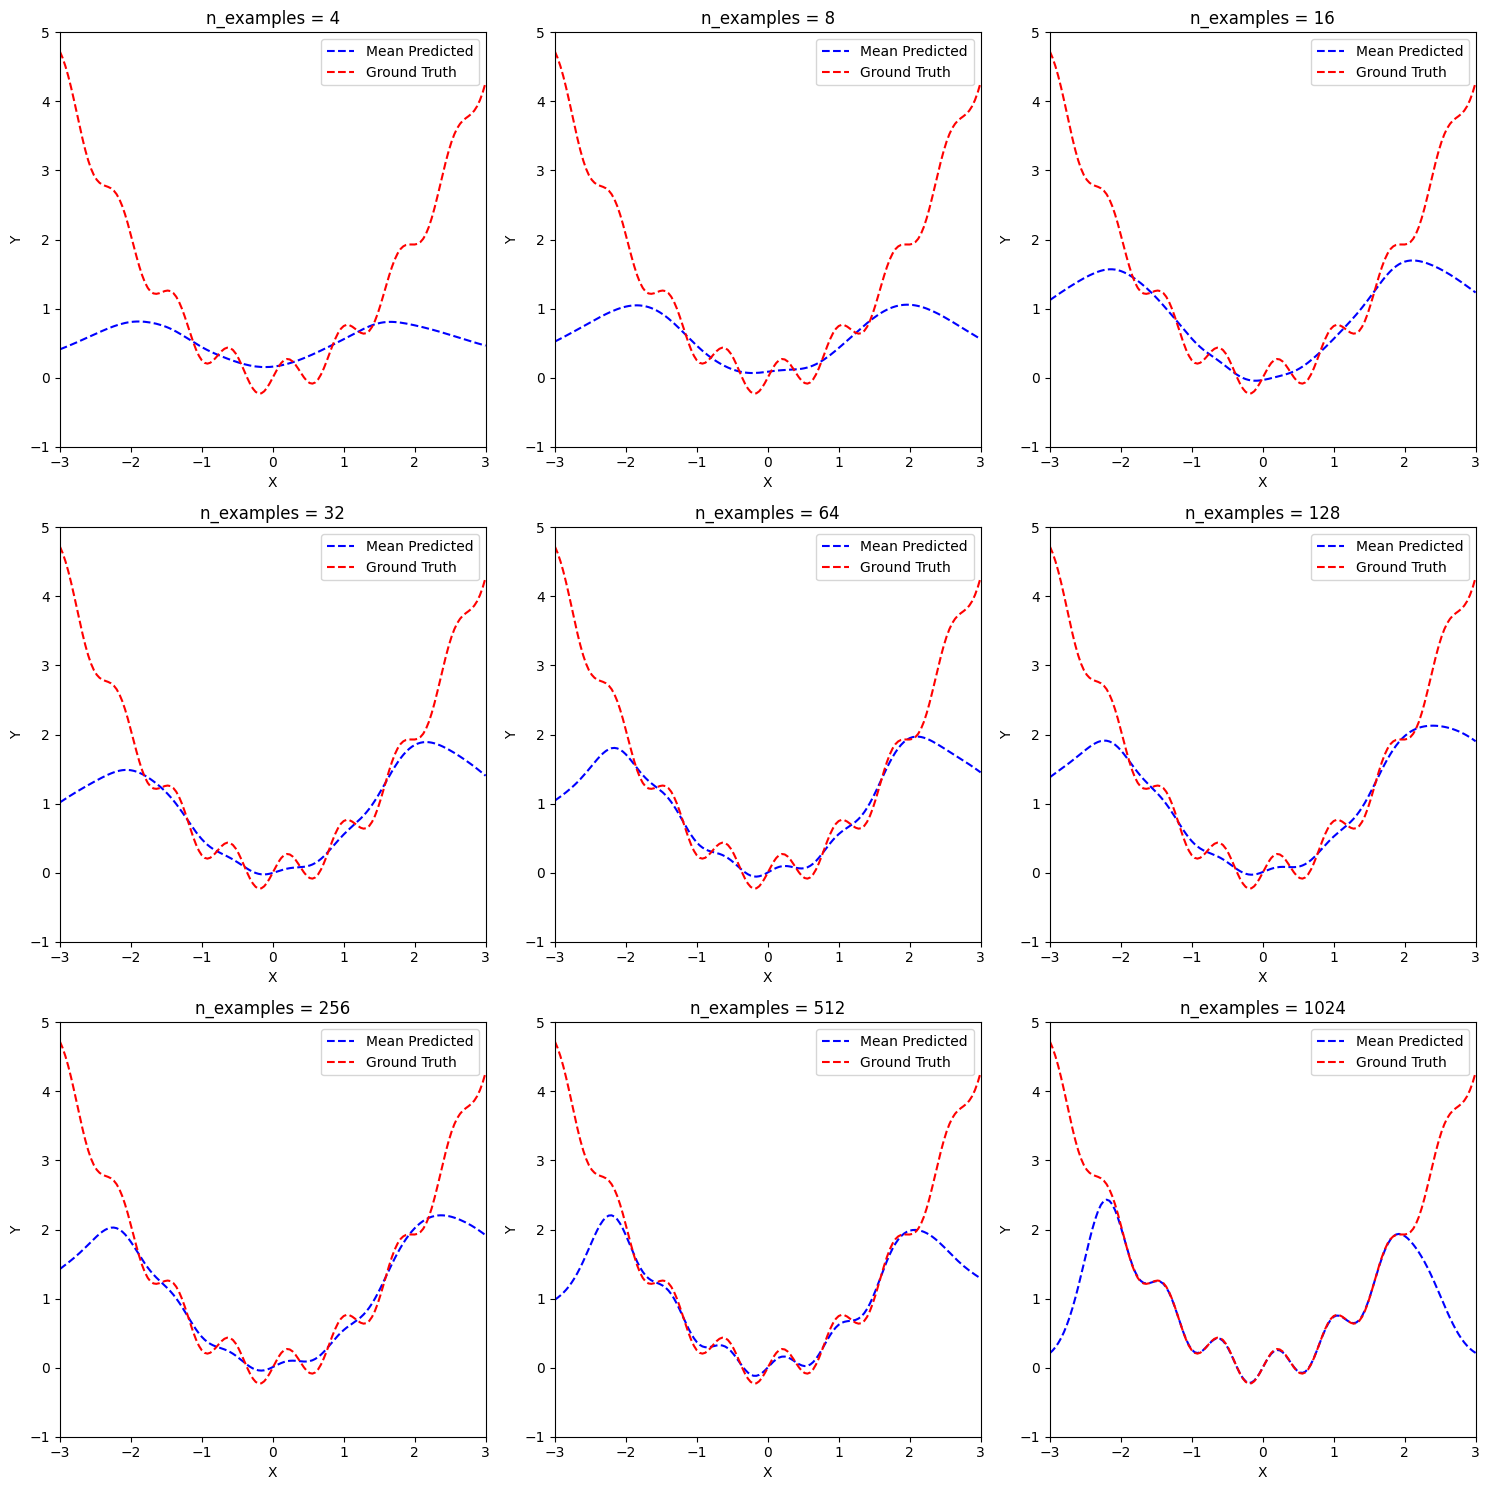

In [ ]:
# Repeat the data generation and the fit of the GaussianProcessRegressor 50 times
n_runs = 50

# Do 3x3 subplots for all listings in n_examples
plt.figure(figsize=(15, 15))
for i, n_examples in enumerate(n_examples_list):
    plt.subplot(3, 3, i + 1)

    # Initialize arrays to store predictions from the 50 runs
    y_preds = np.zeros((n_runs, len(X_test)))

    # Repeat the data generation and the fit of the GaussianProcessRegressor 50 times
    for j in range(n_runs):
        # Generate 50 possible samples, changing the seed for each new run
        x_data, y_data = data_generator(n_examples, seed= i * n_runs + j + 1)

        # Fit GaussianProcessRegressor
        kernel = RBF() + WhiteKernel()
        reg = GaussianProcessRegressor(kernel=kernel)
        reg.fit(x_data, y_data)

        # Predict using the model
        y_pred, _ = reg.predict(X_test, return_std=True)
        y_preds[j, :] = y_pred

    # Plot each of the mean predicted values of the GaussianProcessRegressor in dashed lines
    mean_y_pred = np.mean(y_preds, axis=0)
    plt.plot(X_test, mean_y_pred, 'b--', label='Mean Predicted')

    # Overlay the ground truth concept in red
    plt.plot(X_test, groundTruth(X_test), 'r--', label='Ground Truth')

    # set y_lim to (-1,5) and x_lim to (-3,3)
    plt.ylim(-1, 5)
    plt.xlim(-3, 3)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'n_examples = {n_examples}')
    plt.legend()

plt.tight_layout()
plt.show()

<br>**Part B (1 mark)**<br>

1) Define the following Kernels<br>


>a) A polynomial kernel of degree 2, with a White Noise kernel with sigma 0.01<br><br>
b) A polynomial kernel of degree 5, with a White Noise kernel with sigma 0.01<br><br>
c) A Matern kernel, with a White Noise kernel with sigma 0.01<br><br>
d) A RBF kernel, with a White Noise kernel with sigma 0.01<br><br>
e) A polynomial kernel of degree 2 with an RBF kernel, and a White Noise kernel with sigma 0.01<br><br>
f) A polynomial kernel of degree 2, with a White Noise kernel with sigma 1<br><br>
g) A polynomial kernel of degree 5, with a White Noise kernel with sigma 1<br><br>
h) A Matern kernel, with a White Noise kernel with sigma 1<br><br>
i) A RBF kernel, with a White Noise kernel with sigma 1<br><br>
j) A polynomial kernel of degree 2 with an RBF kernel, and a White Noise kernel with sigma 1<br><br>

In [ ]:
# Define the kernels
kernels = [

    # a) A polynomial kernel of degree 2, with a White Noise kernel with sigma 0.01
    ConstantKernel(1.0) * Exponentiation(DotProduct(), 2) + WhiteKernel(0.01),

    # b) A polynomial kernel of degree 5, with a White Noise kernel with sigma 0.01
    ConstantKernel(1.0) * Exponentiation(DotProduct(), 5) + WhiteKernel(0.01),

    # c) A Matern kernel, with a White Noise kernel with sigma 0.01
    Matern(length_scale=1.0) + WhiteKernel(0.01),

    # d) A RBF kernel, with a White Noise kernel with sigma 0.01
    RBF() + WhiteKernel(0.01),

    # e) A polynomial kernel of degree 2 with an RBF kernel, and a White Noise kernel with sigma 0.01
    ConstantKernel(1.0) * Exponentiation(DotProduct(), 2) + RBF() + WhiteKernel(0.01),

    # f) A polynomial kernel of degree 2, with a White Noise kernel with sigma 1
    ConstantKernel(1.0) * Exponentiation(DotProduct(), 2) + WhiteKernel(1.0),

    # g) A polynomial kernel of degree 5, with a White Noise kernel with sigma 1
    ConstantKernel(1.0) * Exponentiation(DotProduct(), 5) + WhiteKernel(1.0),

    # h) A Matern kernel, with a White Noise kernel with sigma 1
    Matern(length_scale=1.0) + WhiteKernel(1.0),

    # i) A RBF kernel, with a White Noise kernel with sigma 1
    RBF() + WhiteKernel(1.0),

    # j) A polynomial kernel of degree 2 with an RBF kernel, and a White Noise kernel with sigma 1
    ConstantKernel(1.0) * Exponentiation(DotProduct(), 2) + RBF() + WhiteKernel(1.0)
]


2) For each of the kernels in part B.1)<br>
  >Do a 2x3 subplot, in each subplot, you will plot the graphs for one of each results of for n_examples=4,8,16,32,64,128<br><br>
   The subplot should contain
   - the mean predicted values of the GaussianProcessRegressor (with the kernels from part B.1) for now)
   - and the 2 standard deviation intervals of the predictions
   - Overlay the ground truth concept in red in the plot
   - the scatter plots of the data used to fit the GaussianProcessRegressor
   - set y_lim to (-1,5) and x_lim to (-3,3)<br>

> *Note the estimated parameters of the kernels (It will be very useful for the discussion in part C)*<br>



In [ ]:
# Results will be for n_examples=4,8,16,32,64,128
n_examples_new_list = [4, 8, 16, 32, 64, 128]

# Create a 2x3 grid of subplots for each kernel
num_rows = 2
num_cols = 3

# Create a list to store kernel parameter strings
parameter_strings = []

# Iterate over kernels
for i, kernel in enumerate(kernels):
    plt.figure(figsize=(15, 10))  # Create a new figure for each kernel

    # Iterate over each example value for each kernel
    for j, n_examples in enumerate(n_examples_new_list):

        # Calculate subplot position in the 2x3 grid
        row = j // num_cols
        col = j % num_cols

        # Generate data for the given n_examples
        x_data, y_data = data_generator(n_examples)

        # Fit GaussianProcessRegressor with the specified kernel
        reg = GaussianProcessRegressor(kernel=kernel)
        reg.fit(x_data, y_data)

        # Gain the mean predicted values and the 2 standard deviation intervals of the predictions
        y_pred, y_std = reg.predict(X_test, return_std=True)

        # Produce scatter plots of the data used to fit the GaussianProcessRegressor
        plt.subplot(num_rows, num_cols, row * num_cols + col + 1)
        plt.plot(X_test, y_pred, label=f'n_examples = {n_examples}')
        plt.fill_between(X_test.ravel(), y_pred - 2 * y_std, y_pred + 2 * y_std, alpha=0.2)

        # Overlay the ground truth concept in red in the plot
        plt.plot(X_test, groundTruth(X_test), 'r--', label='Ground Truth')

        # Set y_lim to (-1,5) and x_lim to (-3,3)
        plt.ylim(-1, 5)
        plt.xlim(-3, 3)

        # Include the corresponding kernel letter and n_example value in the title
        kernel_letter = chr(ord('a') + i)
        plt.title(f'Kernel {kernel_letter}, n_examples = {n_examples}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()

        # Append kernel parameter string to the list
        kernel_params = reg.kernel_.get_params()
        parameter_strings.append(f'Kernel {kernel_letter}, n_examples = {n_examples}, Parameters: {kernel_params}')

    plt.tight_layout()
    plt.show()




In [ ]:
# Print the list of kernel parameter strings
for param_string in parameter_strings:
    print(param_string)

Kernel a, n_examples = 4, Parameters: {'k1': 0.471**2 * DotProduct(sigma_0=0.000879) ** 2, 'k2': WhiteKernel(noise_level=0.0539), 'k1__k1': 0.471**2, 'k1__k2': DotProduct(sigma_0=0.000879) ** 2, 'k1__k1__constant_value': 0.22211652715411118, 'k1__k1__constant_value_bounds': (1e-05, 100000.0), 'k1__k2__kernel': DotProduct(sigma_0=0.000879), 'k1__k2__exponent': 2, 'k1__k2__kernel__sigma_0': 0.0008794058836881151, 'k1__k2__kernel__sigma_0_bounds': (1e-05, 100000.0), 'k2__noise_level': 0.05387789965871619, 'k2__noise_level_bounds': (1e-05, 100000.0)}
Kernel a, n_examples = 8, Parameters: {'k1': 0.499**2 * DotProduct(sigma_0=3.95e-05) ** 2, 'k2': WhiteKernel(noise_level=0.0269), 'k1__k1': 0.499**2, 'k1__k2': DotProduct(sigma_0=3.95e-05) ** 2, 'k1__k1__constant_value': 0.24891563800238675, 'k1__k1__constant_value_bounds': (1e-05, 100000.0), 'k1__k2__kernel': DotProduct(sigma_0=3.95e-05), 'k1__k2__exponent': 2, 'k1__k2__kernel__sigma_0': 3.954235236948035e-05, 'k1__k2__kernel__sigma_0_bounds'

**Part C (1 mark)**

Discuss the following, what do you notice about:

>a) the behavoir of the regressors as the number of examples used to estimate the regressors increase

>>**Answer:**<br>
>>> There is a noteworthy trend in regressor behaviour - that being that as the number of examples used for estimation increases, the resulting plots demonstrate a progressively closer alignment between the example value line and the ground truth line.
<br><br>
This trend holds true for the majority of kernels, illustrating that a larger training dataset facilitates a more accurate representation of the underlying data patterns. The improved alignment between the example value line and the ground truth line suggests that the regressors become increasingly adept at capturing the nature of the data.
<br><br>
However, it should be noted that kernels a, f, and j appear to deviate from this trend. In these cases, the plots generated remain relatively unchanged as the number of examples increases. This may be indicative of certain limitations or characteristics unique to these specific kernels.
<br><br>
Additionally, I observed that, regardless of the kernel or its peculiarities, there is a consistent reduction in standard deviation as the number of examples increases across all plots. This reduction in standard deviation signifies an increase in prediction stability and confidence as the sample size grows. In other words, it suggests that a larger dataset leads to more reliable and less variable predictions, bolstering the overall robustness of the regressors.
<br>


>b) the extrapolation (the estimated curve outside the region of the data) behavior of the regressors

>>**Answer:**<br>
>>> It's notable that the ground truth line within each plot exhibits a distinct wriggly or oscillatory behavior, primarily concentrated in the central region. This behavior is indicative of the high density of data points generated within the given n_example listings. The presence of ample training data in these regions allows the regressors to capture and replicate intricate fluctuations in the data, resulting in the characteristic wriggling of the ground truth line.
<br><br>
Conversely, as we move away from the densely populated central area into the left and right portions of the plots, we venture into the domain of extrapolation. These outer regions of the plots represent situations where the regressors are tasked with making predictions beyond the boundaries of the training data.
<br><br>
Additionally, the extrapolated segments consistently produce ground truth lines that are notably smoother, exhibiting reduced oscillation compared to their central counterparts. This phenomenon can be attributed to the nature of extrapolation, where the regressors, lacking the guidance of nearby training data, tend to produce more stable and less volatile predictions.
<br><br>
Finally, it's worth noting that the example value lines, which depict the predictions made by the regressors, exhibit similar behavior. They tend to remain relatively stable outside the densely populated data region, mirroring the smoother ground truth lines in these extrapolated segments.
<br><br>
In conclusion, the behavior of extrapolation in these regressors reveals a contrast - being that while the central portions of the plots display more oscillatory ground truth lines, the extrapolated regions consistently yield smoother and more stable predictions. This serves to underscore the adaptability of the regressors when faced with data beyond their training range.

>c) the ability for the regressor to "capture" the wriggly behaivoir in the middle of the data

>>**Answer:**<br>

>>>The regressors, with the exceptions of those represented by kernels a, f, and j, exhibit a clear pattern - their capacity to capture the wriggly behavior improves as the number of training examples increases.
<br><br>
Among the kernels, namely e, c, and h, there is a noteworthy performance in replicating the complexities of the central data region. Specifically, when n_examples is set to 128, these kernels closely match the ground truth values, indicating a strong ability to capture the oscillatory nature of the data. This suggests that a larger training dataset provides the necessary information for these regressors to effectively model and reproduce the nature of the central data behavior.
<br><br>
However, it's notable that kernel d displays a slightly different pattern. This kernel appears to excel at capturing the wriggling portion of the ground truth line when the number of examples is limited to 32 and 64. During these instances, it closely matches the oscillatory behavior seen in the central region of the data. However, when the number of examples is increased to 128, kernel d exhibits a reduced accuracy in matching the ground truth and loses some of its ability to replicate the intricate details of the central data.


>d) the amount of estimated (white) noise epsilon

>>**Answer:**<br>

>>> The amount of estimated (white) noise epsilon varies across different kernels and is influenced by the number of training examples.

>>> Kernels "c," "d," and "e" consistently have very low noise levels (close to 0 or 1e-05), regardless of the number of examples. This suggests that these kernels are relatively stable and produce less variability in their predictions.

>>> Kernels "a," "f," and "b" tend to have higher noise levels compared to the other kernels, suggesting greater instability and variability. Among them, "b" generally has the highest noise levels, followed by "a" and then "f."
<br>

>>> For most kernels, as the number of examples increases, the noise level tends to decrease. This is particularly noticeable in kernels "a" and "c."<br>
Kernel "b" is an exception, as it exhibits a significant increase in noise when transitioning from 8 examples to 16 examples. After that point, the noise level starts to decrease again. This could be indicative of a unique behavior in this kernel with a small to moderate number of examples.

>>> Kernels "c," "d," and "e" share the characteristic of having low noise levels, especially with a larger number of examples. This suggests that these kernels might be more robust or stable when provided with more training data.

>>> Kernels "a" and "f" tend to have similar noise levels, but "a" is generally slightly noisier than "f." This suggests that these two kernels might have similar behaviors, but "f" is slightly more stable.


